In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


# Univariate Analysis

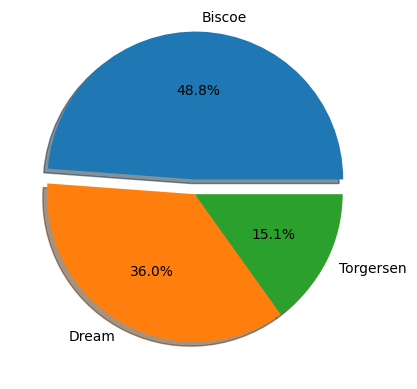

In [3]:
#Pie Plot
plt.pie(df.island.value_counts(),[0.1,0,0],labels=['Biscoe','Dream','Torgersen'],autopct='%0.1f%%',shadow=True)
plt.show()

<Axes: ylabel='sex'>

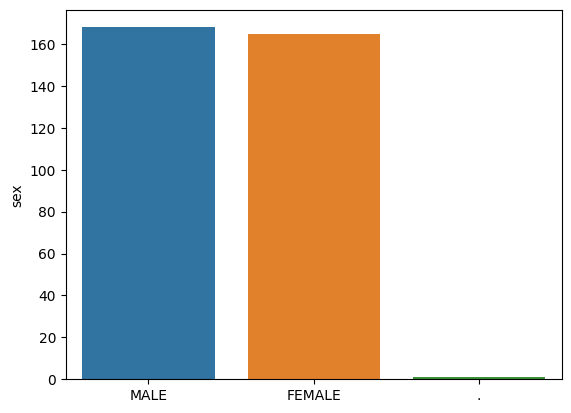

In [4]:
#Barplot
sns.barplot(x=df.sex.value_counts().index,y=df.sex.value_counts())

# Bivariate Analysis

<Axes: xlabel='body_mass_g', ylabel='culmen_length_mm'>

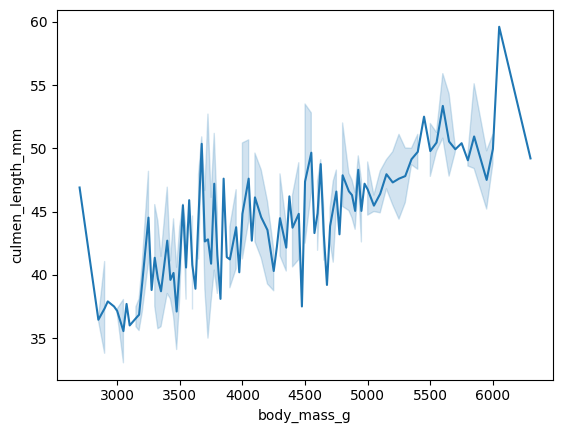

In [5]:
#Lineplot
sns.lineplot(x=df.body_mass_g,y=df.culmen_length_mm)

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

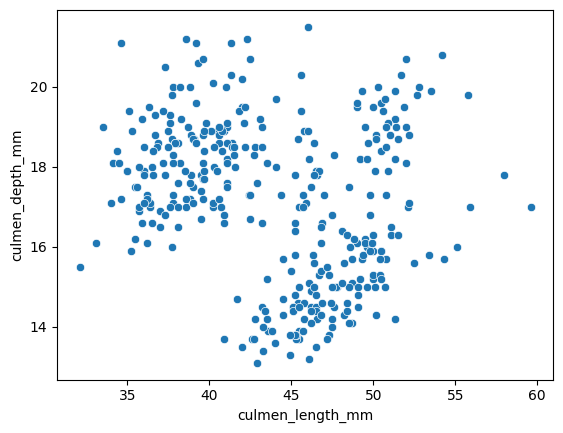

In [6]:
#Scatterplot
sns.scatterplot(x=df.culmen_length_mm,y=df.culmen_depth_mm)

# Multivariate Analysis

<ipython-input-7-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

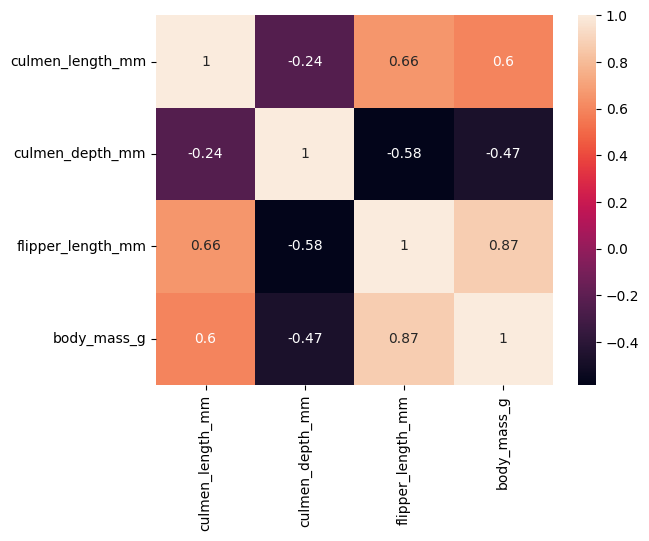

In [7]:
sns.heatmap(df.corr(),annot=True)

# Descriptive Statistics

In [8]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


# Checking for null values

In [9]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [10]:
print(df.sex.value_counts())
#Replace '.' with mode
df['sex']=df.sex.replace('.','MALE')
#Replacing all null values
df.sex=df.sex.fillna('MALE')

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64


In [12]:
#replacing null values with median in numerical columns
df = df.fillna(df.median())

<ipython-input-12-528a7e3c741f>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.median())


In [13]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

# Finding outliers and replacing them

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


<Axes: >

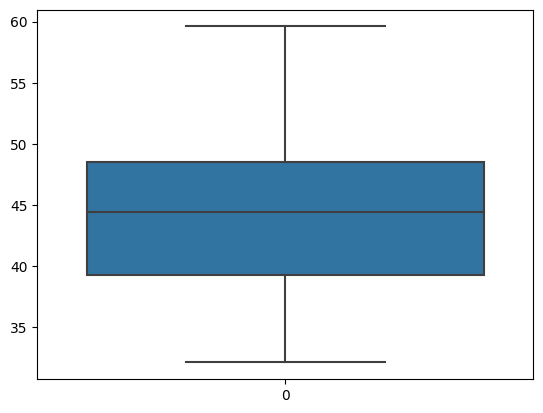

In [15]:
#finding outliers in culmen_length_mm
sns.boxplot(df.culmen_length_mm)

<Axes: >

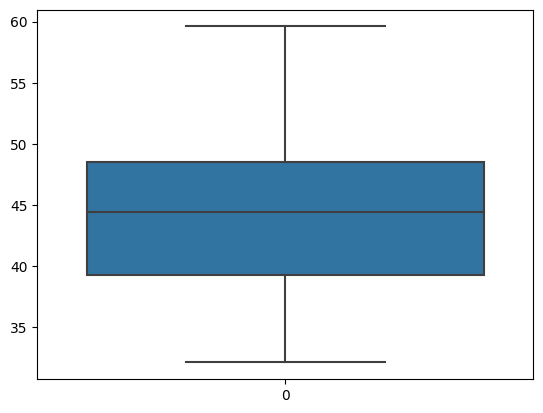

In [16]:
#finding outliers in culmen_depth_mm
sns.boxplot(df.culmen_length_mm)

<Axes: >

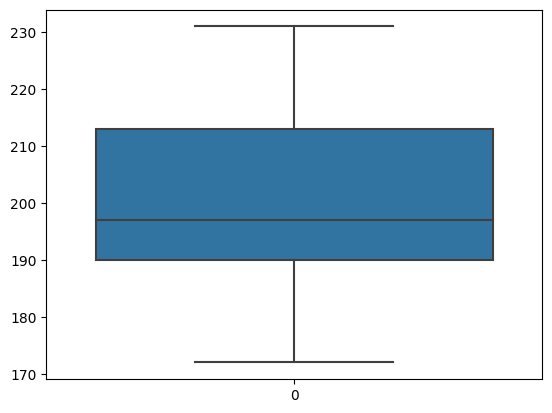

In [17]:
#finding outliers in flipper_length_mm
sns.boxplot(df.flipper_length_mm)

<Axes: >

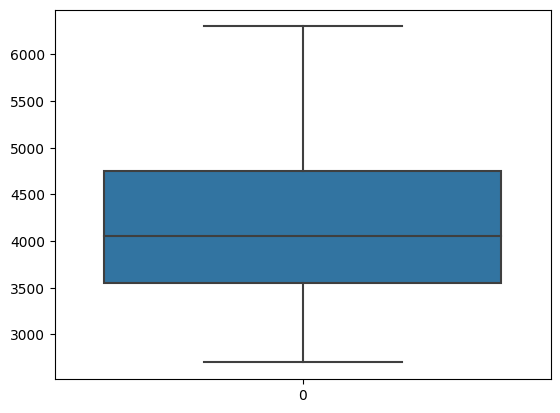

In [18]:
#finding outliers in body_mass_g
sns.boxplot(df.body_mass_g)

In [19]:
#no outliers found

# Label Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [21]:
df['species']=le.fit_transform(df['species'])
df['sex']=le.fit_transform(df['sex'])
df['island']=le.fit_transform(df['island'])

In [22]:
df.corr().species.sort_values(ascending=False)

species              1.000000
flipper_length_mm    0.850819
body_mass_g          0.747547
culmen_length_mm     0.728706
sex                  0.010240
island              -0.635659
culmen_depth_mm     -0.741282
Name: species, dtype: float64

# Splitting independent and dependent variables

In [23]:
X=df.drop(columns=['species'],axis=1)
X.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.10,18.7,181.0,3750.0,1
1,2,39.50,17.4,186.0,3800.0,0
2,2,40.30,18.0,195.0,3250.0,0
3,2,44.45,17.3,197.0,4050.0,1
4,2,36.70,19.3,193.0,3450.0,0


In [24]:
y=df.species
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

# Scaling

In [26]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [27]:
X_scaled=pd.DataFrame(scale.fit_transform(X),columns=X.columns)
X_scaled.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1.0,0.254545,0.666667,0.152542,0.291667,1.0
1,1.0,0.269091,0.511905,0.237288,0.305556,0.0
2,1.0,0.298182,0.583333,0.389831,0.152778,0.0
3,1.0,0.449091,0.500000,0.423729,0.375000,1.0
4,1.0,0.167273,0.738095,0.355932,0.208333,0.0


# Splitting into train and test data

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size =0.2,random_state =0)

In [29]:
x_train.shape

(275, 6)

In [30]:
x_test.shape

(69, 6)